In [26]:
%pip install --upgrade langchain langchain-google-genai google-generativeai


  Using cached langchain_google_genai-2.1.10-py3-none-any.whl.metadata (7.2 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using cached google_generativeai-0.8.5-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.2-py3-none-any.whl.metadata (3.9 kB)
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using cached google_generativeai-0.8.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.0-py3-none-any.whl.metadata (3.9 kB)
INFO: This is taking longer than usual. You might need to pr


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\crish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [218]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

API_IA = os.getenv("GOOGLE_API_KEY")

Conexão com o Gemini

In [219]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = API_IA
)

In [220]:
resp_text = llm.invoke("o que é agentes em IA ?")
print(resp_text.content)

Em Inteligência Artificial (IA), um **agente** é uma entidade (seja um software, um robô físico ou um sistema computacional) que **percebe** seu ambiente através de **sensores** e **age** sobre esse ambiente através de **atuadores**, com o objetivo de alcançar metas ou otimizar algum critério de desempenho.

É um conceito fundamental na IA, servindo como um bloco construtor para a maioria dos sistemas inteligentes.

### Componentes Chave de um Agente em IA:

1.  **Ambiente (Environment):** É o mundo externo onde o agente opera. Pode ser físico (como uma sala para um robô) ou virtual (como um banco de dados, uma página web, ou um jogo para um agente de software).

2.  **Sensores (Sensors):** São os meios pelos quais o agente percebe o estado do ambiente.
    *   **Exemplos para um robô físico:** Câmeras, microfones, sensores de toque, sensores de distância, GPS.
    *   **Exemplos para um agente de software:** Entradas de teclado, dados de um banco de dados, pixels de uma tela, pacotes 

In [221]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."

    """
    decisao: AUTO_RESOLVER
    urgencia: BAIXA
    campo_faltante: []
    """
)

In [222]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [223]:
llm_triagem = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = API_IA
)

In [224]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem_llm(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])
    return saida.model_dump()



In [225]:
testes =["Posso reembolsar a internet",
         "Quero mais 5 dias de trabalho remoto como faço?",
         "já exitio dragoes"]

In [227]:
for msg_text in testes:
    print(f"Pergunta: {msg_text}\n -> Resposta: {triagem_llm(msg_text)}\n")

Pergunta: Posso reembolsar a internet
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: já exitio dragoes
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}



In [228]:
%pip install --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\crish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [229]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("C:\DEV\Agentes de IA Google\documentos").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado arquivo com sucesso {n.name}")
    except Exception as e:
        print(f"Erro ao carregar arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")


Carregado arquivo com sucesso Política de Reembolsos (Viagens e Despesas).pdf
Carregado arquivo com sucesso Política de Uso de E-mail e Segurança da Informação.pdf
Carregado arquivo com sucesso Políticas de Home Office.pdf
Total de documentos carregados: 3


In [230]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)



In [231]:
for chunk in chunks:
    print(chunk)
    print("-----------------------------------------------")

page_content='Política de Reembolsos (Viagens e 
Despesas) 
 
1.​ Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a 
despesa.​
 
2.​ Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não 
são reembolsáveis.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': 'C:\\DEV\\Agentes de IA Google\\documentos\\Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': 'C:\\DEV\\Agentes de IA Google\\documentos\\Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
-----------------------------------------------
page_content='são reembolsáveis.​
 
3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. 
Comprovantes obrigatórios.​
 
4.​ Interne

In [232]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(
    model = "models/gemini-embedding-001",
    google_api_key= API_IA
)

In [233]:
from langchain_community.vectorstores import FAISS
vectorstore = FAISS.from_documents(chunks, embeddings)
retriever = vectorstore.as_retriever(search_type= "similarity_score_threshold", search_kwargs={"score_threshold": 0.3, "k": 4})



In [234]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}") 
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)


In [235]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [236]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [237]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [238]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: Posso reembolsar a internet?
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?
RESPOSTA: Para solicitar mais 5 dias de trabalho remoto, você deve formalizar a solicitação via chamado ao RH com a justificativa do seu gestor. Lembre-se que o modelo padrão da empresa é híb

In [66]:
%pip install --upgrade langgraph

     ---------------------------------------- 0.0/44.7 kB ? eta -:--:--
     ---------------------------------------- 44.7/44.7 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.9 kB ? eta -:--:--
   ---------------------------------------- 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/54.6 kB ? eta -:--:--
   ---------------------------------------- 54.6/54.6 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/121.2 kB ? eta -:--:--
   ---------------------------------------- 121.2/121.2 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\crish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


NÓS

In [239]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
    mensagem: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

In [240]:
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó triagem...")
    return {"triagem": triagem_llm(state["mensagem"])}



In [241]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto-resolver...")
    resposta_rag = perguntar_politica_RAG(state["mensagem"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
       update["acao_final"] = "AUTO_RESOLVER"

    return update

In [242]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info... ")
    faltantes = state["triagem"].get("campos_faltantes, []")
    detalhe = ",".join(faltantes) if faltantes else "Tema e contexto especifico"
    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final":"PEDIR_INFO"
    }

In [243]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgencia {triagem['urgencia']}. Descrição: {state['mensagem'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

In [250]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo apos a triagem")
    decisao = state["triagem"]["decisao"]
    
    if decisao == "AUTO_RESOLVER": return "auto_resolver"
    if decisao == "PEDIR_INFO": return "pedir_info"
    if decisao == "ABRIR_CHAMADO": return "abrir_chamado"
    

ARESTAS

In [251]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto resolver")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalisando o fluxo")
        return "ok"
    state_da_pergunta = (state["mensagem"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontrados keywords de abertura de ticket. Abrindo;...")
        return "abrir_chamado"
    
    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "pedir_info"


In [252]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START,"triagem")

workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto_resolver": "auto_resolver",
    "pedir_info": "pedir_info",
    "abrir_chamado": "abrir_chamado"
    })

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "pedir_info": "pedir_info",
    "abrir_chamado": "abrir_chamado",
    "ok": END
    })

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()


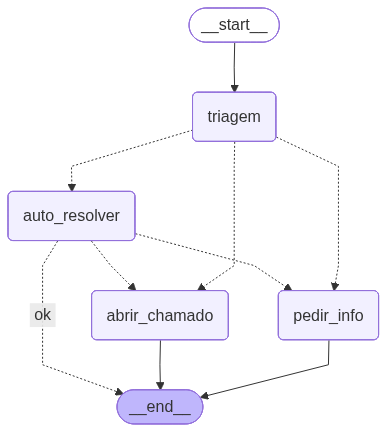

In [253]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [254]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "É possível reembolsar certificações do Google Cloud?",
          "Posso obter o Google Gemini de graça?",
          "Qual é a palavra-chave da aula de hoje?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [255]:
for msg_text in testes:
    resposta_final = grafo.invoke({"mensagem": msg_text})

    triag = resposta_final.get("triagem", {})
    print(f"PERGUNTA: {msg_text}")
    print(f"DECISÃO: {triag.get('decisao')} | URGENCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

Executando nó triagem...
Decidindo apos a triagem
Executando nó de auto-resolver...
Decidindo após o auto resolver
Rag com sucesso, finalisando o fluxo
PERGUNTA: Posso reembolsar a internet?
DECISÃO: AUTO_RESOLVER | URGENCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
------------------------------------
Executando nó triagem...
Deci